## 1. Seleksi Unvariate
---

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("dataset.csv")
data.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [3]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20] 
y = data.iloc[:,-1]    

In [4]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Type','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Type       Score
9           call_for_interview  141.000000
0          years_of_experience   39.070367
5    behavior_competency_score   23.677223
8    top3_behavior_skill_score   22.921452
6    top1_behavior_skill_score   18.063340
7    top2_behavior_skill_score   15.767284
3            top2_skills_score   11.341257
2            top1_skills_score   10.935150
4            top3_skills_score   10.010736
1  functional_competency_score    3.469744


## 2. Feature Importance
---

In [6]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [7]:
# memuat data
data = pd.read_csv("dataset.csv")
X = data.iloc[:,0:20] 
y = data.iloc[:,-1]    

In [8]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09539425 0.02964923 0.035327   0.02784669 0.01432948 0.04306273
 0.05187524 0.06920797 0.02532165 0.60798575]


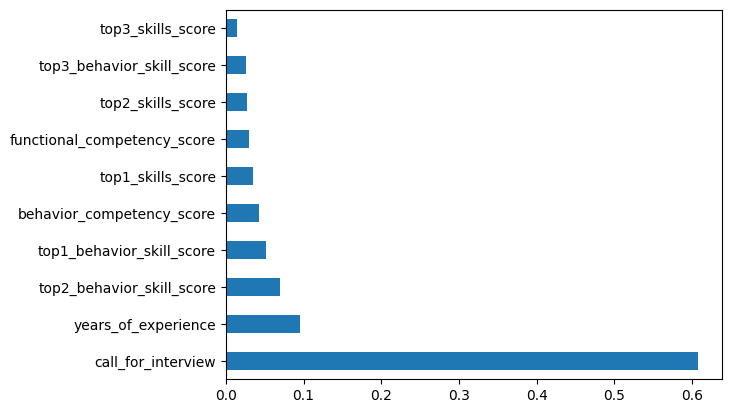

In [9]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 3. Matriks Korelasi dengan Heatmap
---

In [10]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
# memuat data
data = pd.read_csv("dataset.csv")
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]    

In [12]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

## Matriks Korelasi dengan Heatmap (lanjutan)
---

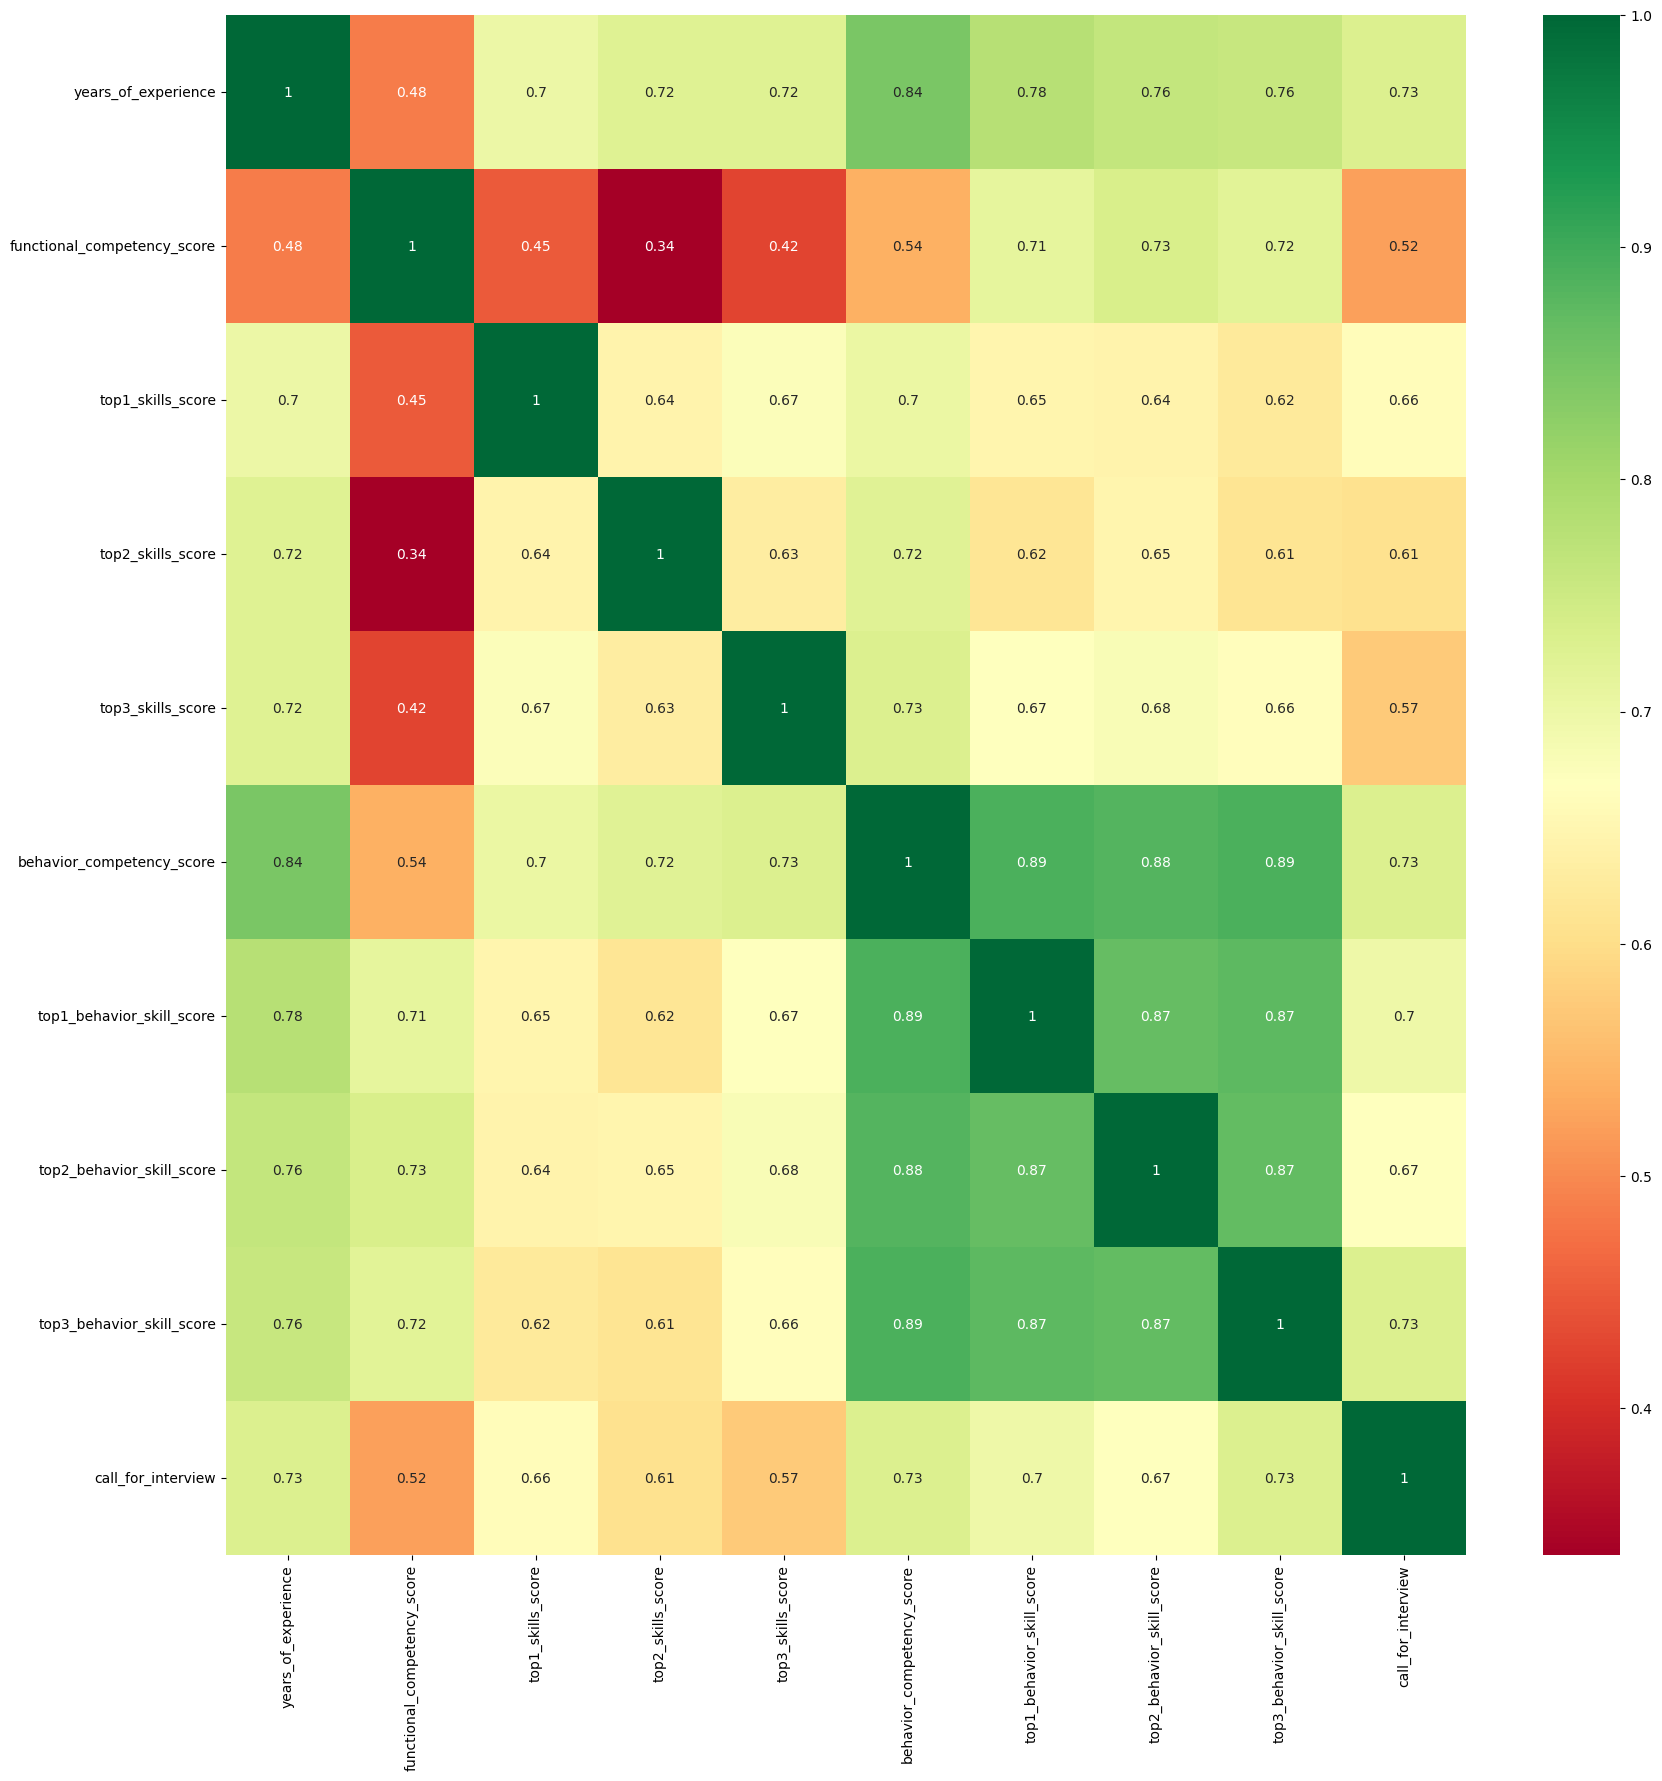

In [13]:
# plot heatmap 
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Kesimpulan 
* lihat pada baris terakhir yaitu call for interview, korelasi antara call for interview dengan fitur lain dimana ada relasi kuat dengan variabel top 3 behavior skill score, years of experience, dan behavior competency score, kemudian diikuti oleh top 1 behavior skill score
* sedangkan utk var functional competency score dan top 3 skill score berkorelasi lemah dengan call for interview